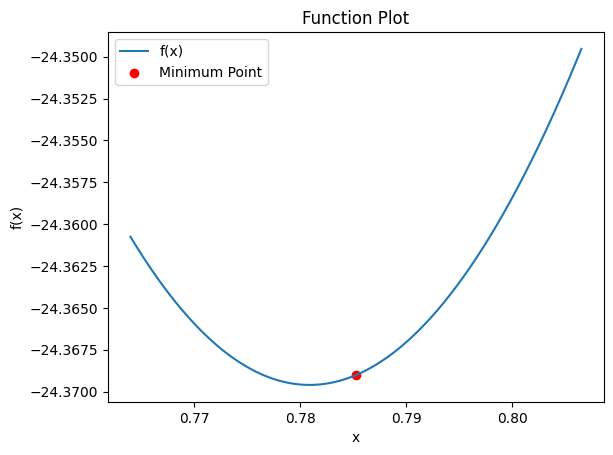

Minimum point (xmin): 0.785249461705289
Minimum function value (fmin): -24.36901434967632
Number of iterations: 8


In [22]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def golden_section_search(f, a, b, tol):
    gr = 0.618
    iterations = []
    a_values = []
    b_values = []
    x1_values = []
    x2_values = []
    fx1_values = []
    fx2_values = []


    x1 = b - (b - a) * gr
    x2 = a + (b - a) * gr


    f1 = f(x1)
    f2 = f(x2)


    while abs(b - a) > tol:
        iterations.append(len(iterations) + 1)
        a_values.append(a)
        b_values.append(b)
        x1_values.append(x1)
        x2_values.append(x2)
        fx1_values.append(f1)
        fx2_values.append(f2)

        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = b - (b - a) * gr
            f1 = f(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + (b - a) * gr
            f2 = f(x2)


    xmin = (a + b) / 2
    fmin = f(xmin)


    data = {
        'Iteration': iterations,
        'a': a_values,
        'b': b_values,
        'x1': x1_values,
        'x2': x2_values,
        'f(x1)': fx1_values,
        'f(x2)': fx2_values
    }
    df = pd.DataFrame(data)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)


    x = np.linspace(a, b, 1000)
    y = f(x)
    plt.plot(x, y, label='f(x)')
    plt.scatter(xmin, fmin, color='red', label='Minimum Point')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Function Plot')
    plt.legend()
    plt.show()

    return df, xmin, fmin, len(iterations)


def function(x):
    return x**4 - 14*x**3 + 60*x**2 - 70*x

tolerance = 0.05
df, xmin, fmin, num_iterations = golden_section_search(function, 0, 2, tolerance)

print("Minimum point (xmin):", xmin)
print("Minimum function value (fmin):", fmin)
print("Number of iterations:", num_iterations)

In [23]:
df

,Iteration,a,b,x1,x2,f(x1),f(x2)
0,1,0.000000,2.000000,0.764000,1.236000,-24.360751,-18.959637
1,2,0.000000,1.236000,0.472152,0.764000,-21.098872,-24.360751
2,3,0.472152,1.236000,0.764000,0.944210,-24.360751,-23.593033
3,4,0.472152,0.944210,0.652478,0.764000,-23.837455,-24.360751
4,5,0.652478,0.944210,0.764000,0.832768,-24.360751,-24.288034
5,6,0.652478,0.832768,0.721349,0.764000,-24.257908,-24.360751
6,7,0.721349,0.832768,0.764000,0.790206,-24.360751,-24.366928
7,8,0.764000,0.832768,0.790206,0.806499,-24.366928,-24.349535
